In [1]:
#Import python libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [3]:
data = pd.read_csv('C:/Users/Chinmayee/Desktop/Population Prediction.csv')
print(data)

    Year  Population  ChangePerc  NetChange  Density       Urban  UrbanPerc
0   2000  1787685764        2.01  548376453       23  1252543844         36
1   2001  1987685764        1.76  874635234       18  6484282010         28
2   2002  2087685764        1.72  876354226       25   362511939         25
3   2003  2287685764        1.59  464527345       36  9173971289         31
4   2004  2587685764        1.90  987563425       52  2835391919         52
5   2005  2687685764        1.34  425317492       27  1634718710         27
6   2006  2787685764        1.67  736241837       43   634768489         43
7   2007  2887685764        1.50  264528429       32  1192838921         32
8   2008  2987685764        1.54  563820183       21  2638713709         19
9   2009  3187685764        1.46  918374932       33   862835119         33
10  2010  3487685764        1.42  824749173       26   913636923         27
11  2011  3687685764        1.76  593658292       23  2319937917         23
12  2012  37

### DATA DESCRIPTION

### Variables:
* Year: 1951 to 2020
* Population: World Population
* ChangePerc: Yearly Change in Percentage
* NetChange: Total Yearly Change
* Density: Density in P/Km²
* Urban: Urban Population
* UrbanPerc: Urban Population Percentage

In [4]:
data.sample(10)

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
9,2009,3187685764,1.46,918374932,33,862835119,33
19,2019,4987685764,1.70,183674390,22,1973973792,22
12,2012,3787685764,1.30,766383950,29,9895983947,42
8,2008,2987685764,1.54,563820183,21,2638713709,19
0,2000,1787685764,2.01,548376453,23,1252543844,36
14,2014,3987685764,1.90,183641081,35,1273786380,39
2,2002,2087685764,1.72,876354226,25,362511939,25
13,2013,3887685764,1.86,163820183,37,153626838,37
15,2015,4687685764,1.23,845720911,38,1797934949,38
4,2004,2587685764,1.90,987563425,52,2835391919,52


In [5]:
data.shape

(21, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        21 non-null     int64  
 1   Population  21 non-null     int64  
 2   ChangePerc  21 non-null     float64
 3   NetChange   21 non-null     int64  
 4   Density     21 non-null     int64  
 5   Urban       21 non-null     int64  
 6   UrbanPerc   21 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 1.3 KB


In [7]:
data.isnull().sum()
#No null values

Year          0
Population    0
ChangePerc    0
NetChange     0
Density       0
Urban         0
UrbanPerc     0
dtype: int64

In [8]:
data.describe()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
count,21.000000,2.100000e+01,21.000000,2.100000e+01,21.000000,2.100000e+01,21.000000
mean,2010.000000,3.538638e+09,1.614286,5.392311e+08,33.380952,2.343835e+09,35.714286
std,6.204837,1.164740e+09,0.224668,2.936743e+08,10.002381,2.745054e+09,10.417019
min,2000.000000,1.787686e+09,1.230000,1.638202e+08,18.000000,9.989932e+07,19.000000
25%,2005.000000,2.687686e+09,1.420000,1.836747e+08,25.000000,9.136369e+08,27.000000
50%,2010.000000,3.487686e+09,1.590000,5.638202e+08,33.000000,1.273786e+09,36.000000
75%,2015.000000,4.687686e+09,1.760000,8.247492e+08,41.000000,2.319938e+09,43.000000
max,2020.000000,5.987686e+09,2.010000,9.875634e+08,52.000000,9.895984e+09,57.000000


### DATA VISUALIZATION

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data_without_year = data.drop('Year',axis = 1)

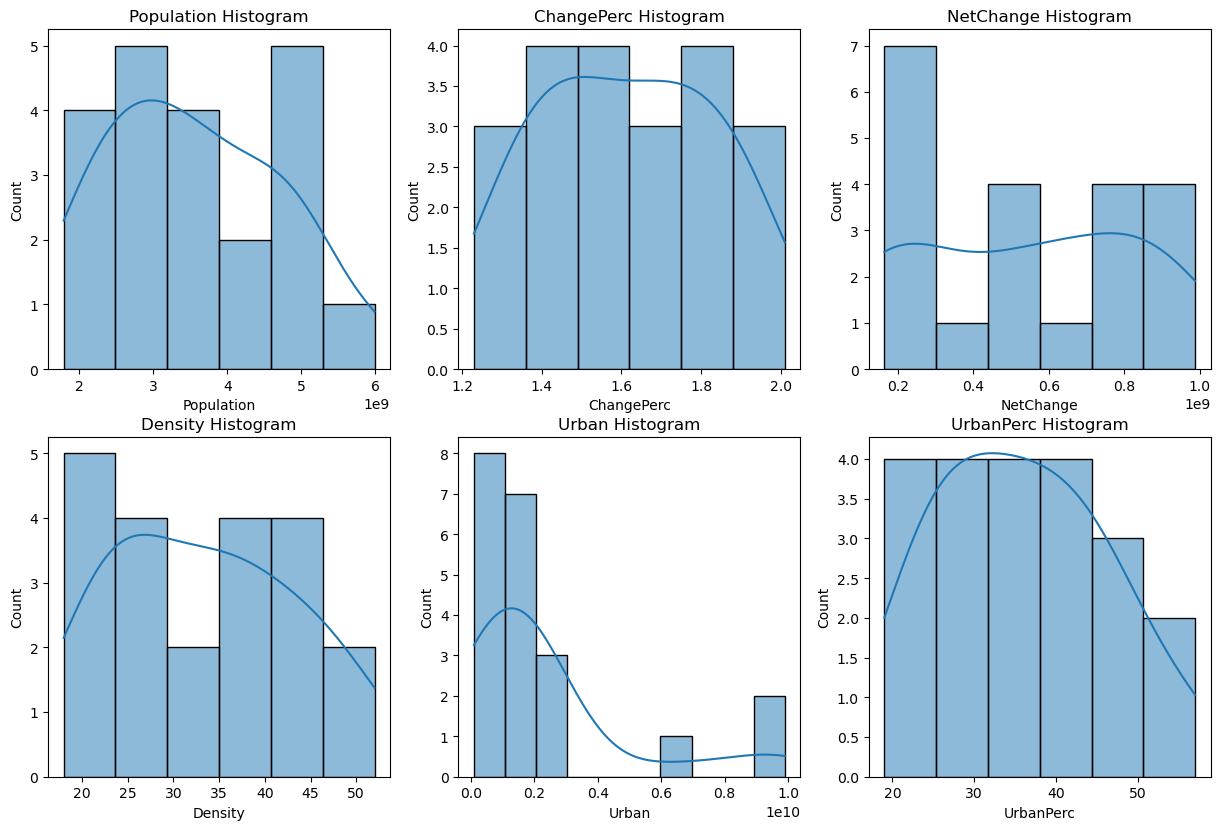

In [11]:
plt.figure(figsize = (15,15))
for i,feature in enumerate(data_without_year.columns):
    ax = plt.subplot(3,3,i+1)
    sns.histplot(data_without_year[feature],kde = True)
    ax.set_title(feature + " Histogram")

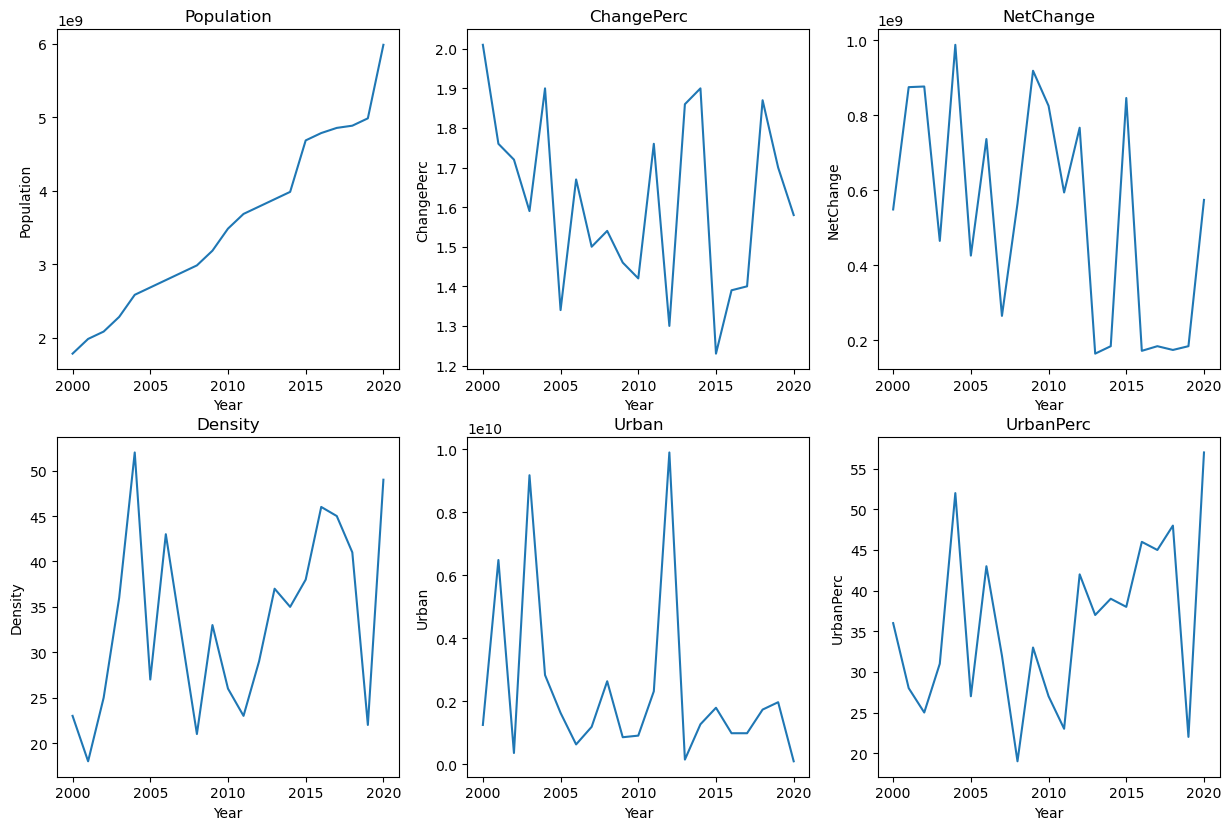

In [12]:
plt.figure(figsize = (15,15))
for i, feature in enumerate(data_without_year.columns):
    ax = plt.subplot(3,3,i+1)
    sns.lineplot(x = data['Year'], y = data_without_year[feature])
    ax.set_title(feature)

<AxesSubplot:>

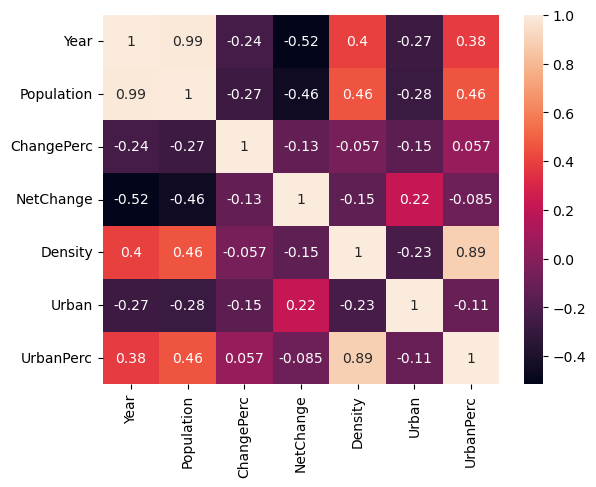

In [13]:
sns.heatmap(data.corr(),annot = True)

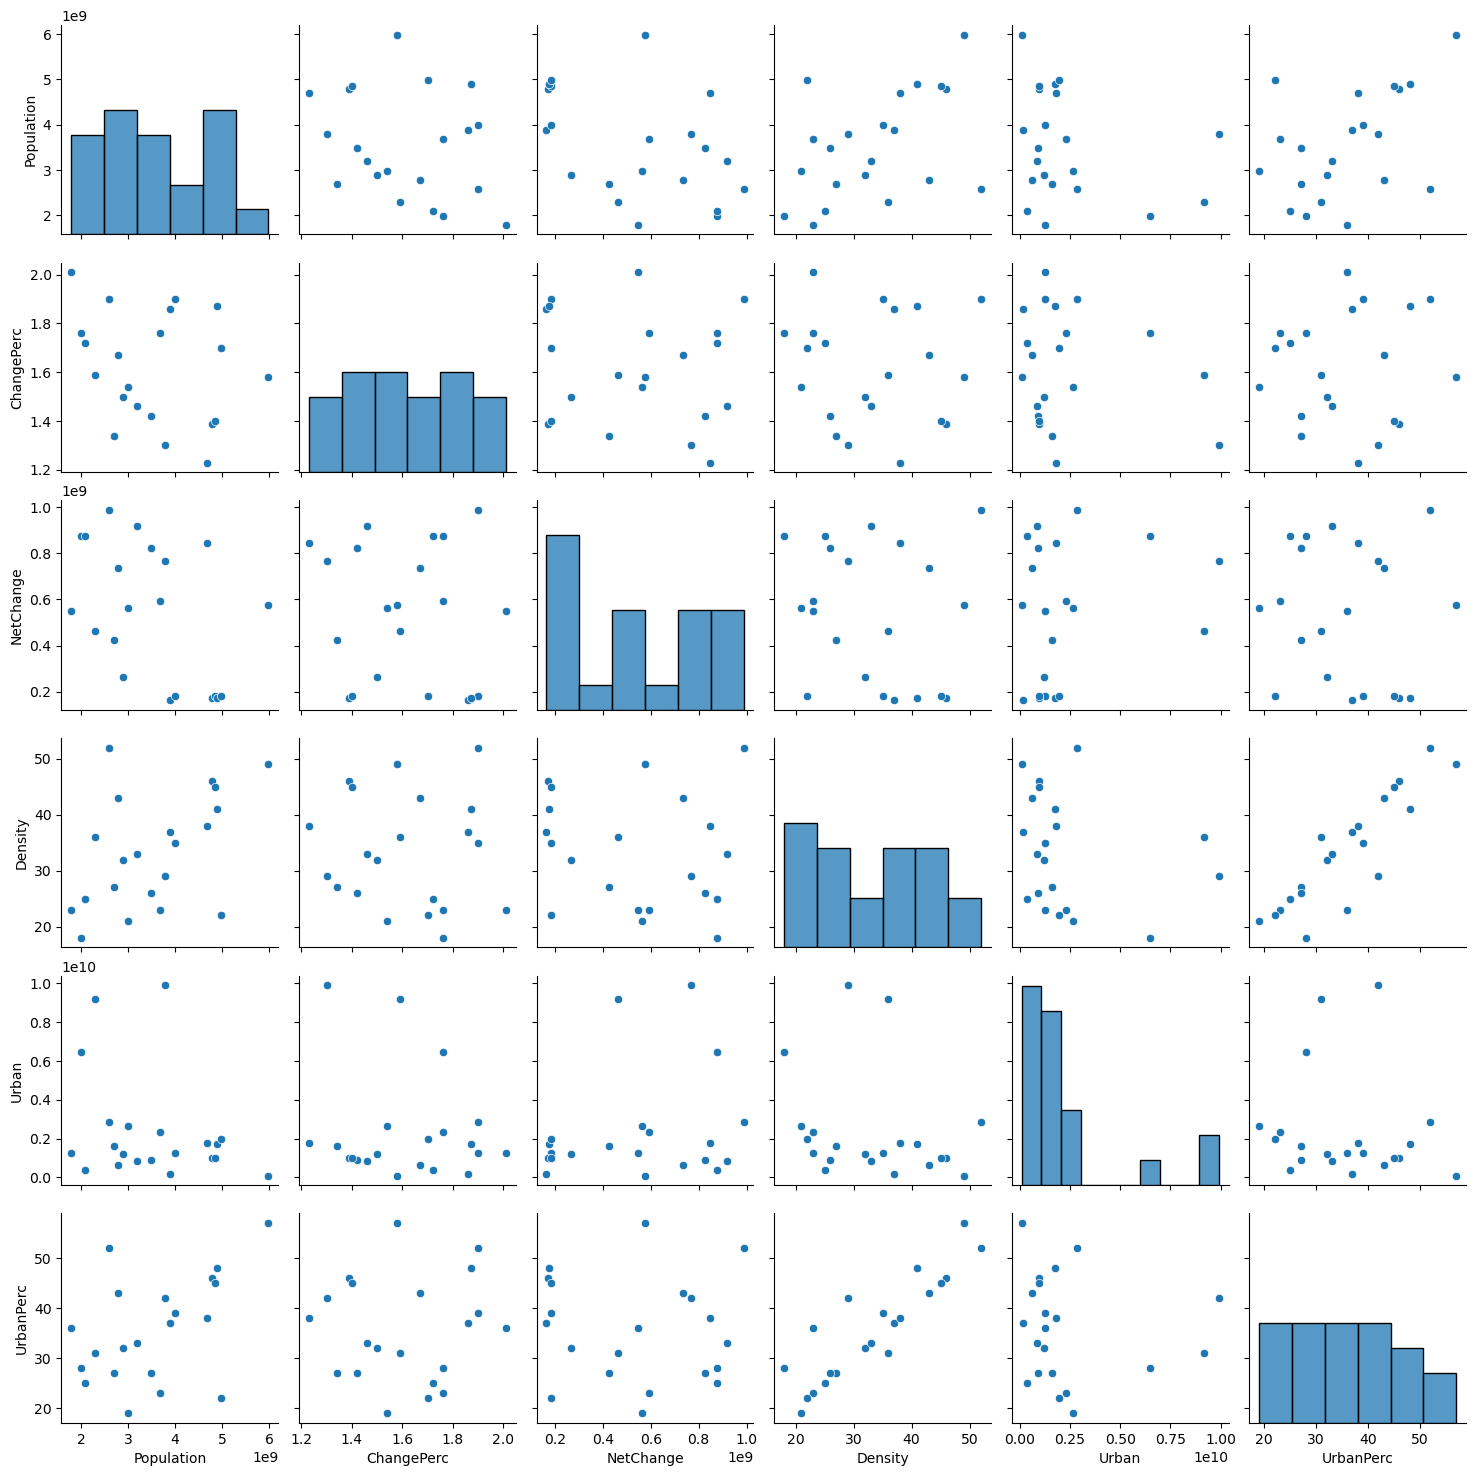

In [14]:
sns.pairplot(data_without_year)

World Population is directly related to Urban Population, Urban Percentage and Density and almost inversely related to Change in Percent

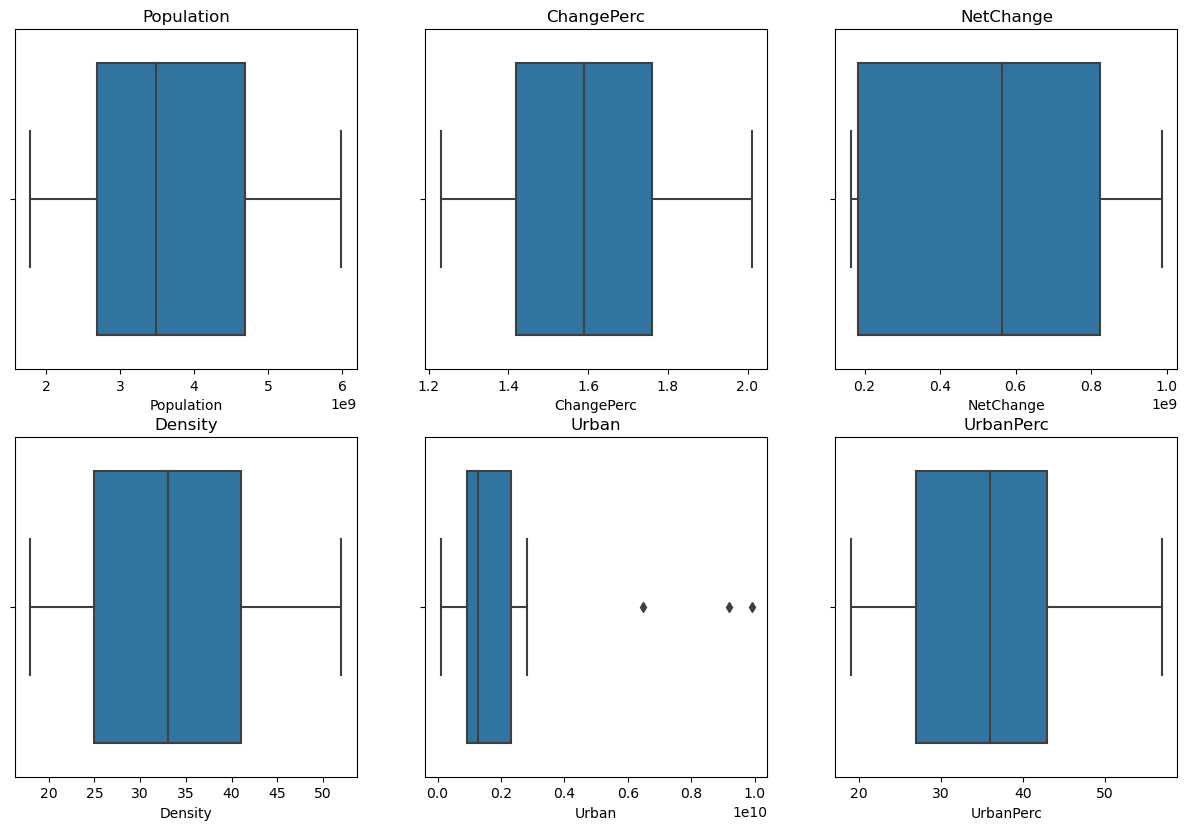

In [15]:
plt.figure(figsize = (15,15))
for i,feature in enumerate(data_without_year.columns):
    ax = plt.subplot(3,3,i+1)
    sns.boxplot(x = data_without_year[feature], data = data_without_year)
    ax.set_title(feature)

From box-plot, Net change in population has outliers. So, we will remove it for model building.
Since, feature Urban is highly correlated to Population which can lead to overfitting we will remove it too.

In [16]:
x = np.array(data.drop(['Population','NetChange','Urban'],axis = 1))
y = np.array(data['Population'])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.reshape(-1, 1))

In [18]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [19]:
x.head()

,0,1,2,3
0,-1.651446,1.804825,-1.063478,0.028105
1,-1.486301,0.664593,-1.575703,-0.758834
2,-1.321157,0.482155,-0.858588,-1.053936
3,-1.156012,-0.110765,0.268309,-0.463732
4,-0.990867,1.303123,1.907431,1.601983


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

### LINEAR REGRESSION  MODEL

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
lr_model = lr.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

In [23]:
y_pred

array([[-1.95259562],
       [ 1.32392565],
       [ 0.95224884],
       [-1.78396396],
       [-0.54205208],
       [-0.87113648],
       [-0.09681304]])

In [24]:
print("Score ", lr_model.score(x_test,y_test)*100)

Score  93.56430720672756


In [25]:
x_test.shape

(7, 4)

In [26]:
y_test.shape

(7, 1)